## SVM Model for Predicting permeability on Kidron dataset

##### (Dataset taken from - Prediction of the Corneal Permeability of Drug-Like Compounds Heidi Kidron & Kati-Sisko Vellonen & Eva M. del Amo & Anita Tissari & Arto Urtti )

### 1. Importing libraries
#### Pandas and numpy for data import and processing
#### Matplotlib for visualisation

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import os
print(plt.style.available)
plt.style.use('seaborn-whitegrid')
import seaborn as sns

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [157]:
## Plotting config
colourWheel =['#329932',
            '#ff6961',
            'b',
            '#6a3d9a',
            '#fb9a99',
            '#e31a1c',
            '#fdbf6f',
            '#ff7f00',
            '#cab2d6',
            '#6a3d9a',
            '#ffff99',
            '#b15928',
            '#67001f',
            '#b2182b',
            '#d6604d',
            '#f4a582',
            '#fddbc7',
            '#f7f7f7',
            '#d1e5f0',
            '#92c5de',
            '#4393c3',
            '#2166ac',
            '#053061']
dashesStyles = [[3,1],
            [1000,1],
            [2,1,10,1],
            [4, 1, 1, 1, 1, 1]]

## 2. Importing dataset from csv file. 

In [50]:
dataset = pd.read_csv("D:\Google Drive\Drug Discovery\Dataset\Kidron_dataset.csv")
dataset.head()

,Name,MW,MV,PSA,HBD,HBA,HBtot,logP,logD70,logD74,logD80,perm,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,"acetazolamideb,c",222.3,127.0,151.7,3.0,7.0,10.0,-0.26,-0.40,-0.55,-0.94,9.100000e-07,NaN,NaN,NaN,NaN
1,alprenololD,249.3,247.0,41.5,2.0,3.0,5.0,2.88,0.77,1.13,1.70,2.900000e-05,NaN,NaN,NaN,NaN
2,atenolole,266.3,237.0,84.6,4.0,5.0,9.0,0.10,-2.02,-1.65,-1.09,6.700000e-07,NaN,NaN,NaN,NaN
3,benzolamideb,320.4,183.0,177.1,3.0,8.0,11.0,0.20,-1.40,-1.70,-2.11,1.400000e-07,NaN,NaN,NaN,NaN
4,bevantolole,345.4,311.0,60.0,2.0,5.0,7.0,3.38,1.71,2.09,2.62,5.400000e-05,NaN,NaN,NaN,NaN


In [51]:
dataset = dataset.iloc[:,:12]
dataset = dataset.dropna()
dataset.head()

,Name,MW,MV,PSA,HBD,HBA,HBtot,logP,logD70,logD74,logD80,perm
0,"acetazolamideb,c",222.3,127.0,151.7,3.0,7.0,10.0,-0.26,-0.40,-0.55,-0.94,9.100000e-07
1,alprenololD,249.3,247.0,41.5,2.0,3.0,5.0,2.88,0.77,1.13,1.70,2.900000e-05
2,atenolole,266.3,237.0,84.6,4.0,5.0,9.0,0.10,-2.02,-1.65,-1.09,6.700000e-07
3,benzolamideb,320.4,183.0,177.1,3.0,8.0,11.0,0.20,-1.40,-1.70,-2.11,1.400000e-07
4,bevantolole,345.4,311.0,60.0,2.0,5.0,7.0,3.38,1.71,2.09,2.62,5.400000e-05


In [52]:
max(dataset['perm'])

7.900000000000001e-05

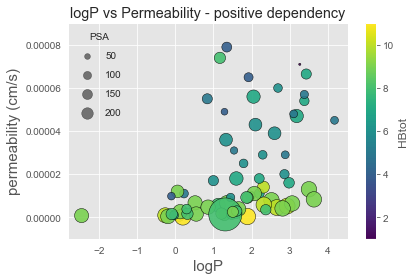

In [53]:
# volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
color =  dataset['HBtot']

fig, ax = plt.subplots()
res = ax.scatter(dataset['logP'], dataset['perm'],  s=dataset['PSA']*1.5, c=color, alpha=0.9, edgecolors='black', cmap='viridis')

ax.set_xlabel('logP', fontsize=15)
ax.set_ylabel('permeability (cm/s)', fontsize=15)
ax.set_title('logP vs Permeability - positive dependency')
ax.set_ylim(-0.1e-04, 9.0e-05)
fig.colorbar(res, label='HBtot')

for val in [50, 100, 150,200]:
    plt.scatter([], [], c='black', alpha=0.5, s=val/1.5,
                label=str(val))
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='PSA', loc='upper left')

#ax.grid(True)
fig.tight_layout()
#plt.savefig("trial.pdf", dpi=1200)
plt.show()

### Shuffling the dataset

In [93]:
from sklearn.utils import shuffle
dataset = shuffle(dataset)

In [94]:
df = dataset.iloc[:,1:]
del df['logD70']
del df['logD74']
del df['logD80']

## 3. Scaling the dataset

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
scaler = StandardScaler()
df[['MW','MV', 'PSA','HBD', 'HBA', 'HBtot', 'logP', 'perm']] = scaler.fit_transform(df[['MW','MV', 'PSA','HBD', 'HBA', 'HBtot', 'logP','perm']])
df.head()

,MW,MV,PSA,HBD,HBA,HBtot,logP,perm
28,0.056416,1.533281,-0.725768,-0.157329,-1.401139,-1.261580,2.065938,1.125946
44,0.729992,-0.783148,0.854712,0.928242,1.620067,1.810739,0.171590,-0.870952
0,-1.168427,-1.404628,0.534499,0.928242,1.015826,1.298686,-1.614748,-0.845906
54,0.568688,0.553978,-0.219145,-0.157329,1.015826,0.786632,-0.393392,-0.810575
25,-0.369000,1.081295,-0.620555,-0.157329,-0.796898,-0.749527,0.088504,0.231479


In [97]:
cnsDf = pd.read_csv("D:\Google Drive\Drug Discovery\Dataset\CNS_test_drugs.csv")
scaler1 = StandardScaler()
cns = cnsDf.iloc[:,2:9]
cns[['MW', 'Volume', 'SA', 'logP','Hacc', 'Hdonor', 'Hbtot']] = scaler1.fit_transform(cns[['MW', 'Volume', 'SA', 'logP','Hacc', 'Hdonor', 'Hbtot']])
cns.head()

,MW,Volume,SA,Hacc,Hdonor,Hbtot,logP
0,-0.035341,-0.276177,0.103264,1.785550,1.883683,1.961916,-2.258204
1,-1.254030,-1.382759,-1.534707,-1.074028,-0.267987,-0.712268,0.732529
2,-1.529459,-1.445954,-1.456824,-1.087516,-0.153738,-0.657606,0.368668
3,1.357351,1.227662,1.096269,-0.300964,-1.635188,-1.043319,0.212649
4,0.172473,0.797888,0.991614,-0.655460,-0.609334,-0.675775,1.018770


In [98]:
cnsTest = cns.to_numpy()

In [99]:
dfInverse = df.copy()
dfPredInverse = df.copy()


In [100]:
df = df.to_numpy()

In [101]:
X = df[:,:-1]
Y = df[:,-1:]

## 4. Splitting the dataset into training and testing datasets
#### The dataset is 15% of the complete dataset and the rest 85% is the train data
#### Dataset is also split into X (parameters) and Y (target value - permeability ) for the train and test data

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 0)

#### Training data shape - 58 compounds, each with 7 parameters and correspinding permeability

In [104]:
X_train.shape

(58, 7)

In [105]:
Y_train.shape

(58, 1)

#### Test data shape - 11 compounds, each with 7 parameters and correspinding permeability

In [106]:
X_test.shape

(11, 7)

In [107]:
cnsTest.shape

(7, 7)

In [108]:
X_test = np.concatenate((X_test, cnsTest))
X_test.shape

(18, 7)

In [109]:
Y_test.shape

(11, 1)

## 5. SVM model for regression to predict permeability
### SVR class from sci-kit learn is used to create the model
#### Model parameters - rbf kernel (function) for regression, epsilon = 0.1 (no losses for prediction within this range), gamma specifies kernel coefficient

In [110]:
from sklearn.svm import SVR

In [111]:
regressor = SVR( kernel='rbf', C=10, gamma=0.1, epsilon=.1)
regressor.fit(X_train, Y_train.ravel())

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#### Predicting the permeability for training set

In [112]:
Y_pred = regressor.predict(X_train)

In [113]:
Y_pred

array([ 0.06403484, -0.47634396,  0.77868371, -0.437641  , -0.44937055,
       -0.71517776, -0.74456564,  0.13114506, -0.0262682 , -0.72674875,
       -0.94567897,  1.03843148, -0.78001866, -0.91086887, -0.92369682,
        0.9842919 , -0.49480594, -0.7696756 , -0.38515608, -0.75181662,
        0.8952558 , -0.42413887, -0.72892662, -0.90317306,  2.12039066,
       -0.71825241,  0.55235719, -0.50045268,  0.43594531,  1.22585029,
       -0.757975  , -0.74156667,  0.83560054, -0.60844059,  0.46946307,
        0.59960546, -0.87497869, -0.34825635, -0.18202787,  1.94184293,
       -0.56673985,  0.62302402,  1.20847296, -0.36058591, -0.48711674,
       -0.97094215, -0.81200157, -0.55705256, -0.53581398, -0.18202787,
       -0.81917152, -0.72855997,  1.98764706, -0.57505141,  2.18873076,
       -0.70135442,  1.42814192, -0.7012795 ])

#### Score of predition on training set

In [114]:
regressor.score(X_train, Y_train)

0.857889522633603

#### Score of prediction on test set

In [115]:
#regressor.score(X_test, Y_test)

## 6. Plotting the results
### Actual permeability plotted against predicted permeability for training and test data

In [116]:
import seaborn as sns
sns.set_style("whitegrid") 

#### Plot of actual permeability against predicted permeability for training set
#### Closeness to lines indicate higher accuracy

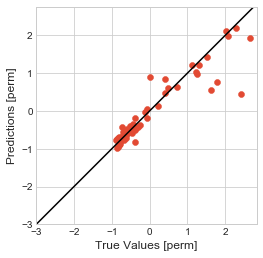

In [164]:
plt.scatter(Y_train, Y_pred, )
plt.xlabel('True Values [perm]')
plt.ylabel('Predictions [perm]')
plt.axis('equal')
plt.axis('square')
plt.xlim([-3,plt.xlim()[1]])
plt.ylim([-3,plt.ylim()[1]])
_ = plt.plot([-3, 3], [-3, 3], c='black')

In [118]:
# import chart_studio.plotly as py
# import plotly.graph_objs as go

#### Plot of actual permeability against predicted permeability for test set
#### Closeness to lines indicate higher accuracy

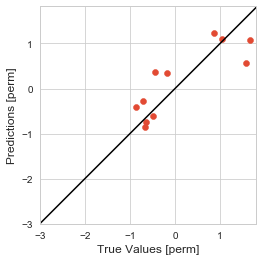

In [119]:
test_predictions = regressor.predict(X_test)
plt.scatter(Y_test, test_predictions[:11])
plt.xlabel('True Values [perm]')
plt.ylabel('Predictions [perm]')
plt.axis('equal')
plt.axis('square')
plt.xlim([-3,plt.xlim()[1]])
plt.ylim([-3,plt.ylim()[1]])
_ = plt.plot([-3, 3], [-3, 3], c='black')

In [120]:
train = np.concatenate((X_train, Y_train), axis=1)
test = np.concatenate((X_test[:11], Y_test), axis=1)
dataArr = np.concatenate((train, test))
dfScaled = pd.DataFrame(dataArr)
dfScaled.head()

,MW,MV,PSA,HBD,HBA,HBtot,logP,perm
0,-0.221877,-0.557155,0.201706,-0.157329,-0.192657,-0.237474,-0.069358,-0.081584
1,0.464107,0.704640,-0.662869,-0.157329,-0.796898,-0.749527,-0.193986,-0.475150
2,0.340559,1.627256,-0.620326,-0.157329,-0.796898,-0.749527,0.836273,1.796796
3,1.119070,1.131013,-0.366901,-0.157329,0.411585,0.274579,0.570400,-0.730073
4,0.499558,1.062462,0.034738,-0.157329,1.015826,0.786632,-1.348874,-0.349925


In [132]:
dfUnscaled = pd.DataFrame(scaler.inverse_transform(dfScaled)).rename(columns={0: "MW", 1: "MV", 2: "PSA", 3:"HBD", 4:"HBA", 5:"HBtot", 6:"logP", 7:"perm"})
dfUnscaled.head()

,MW,MV,PSA,HBD,HBA,HBtot,logP,perm
0,275.70,172.00,122.60,2.0,5.0,7.0,1.60,0.000018
1,314.40,239.00,47.00,2.0,4.0,6.0,1.45,0.000009
2,307.43,287.99,50.72,2.0,4.0,6.0,2.69,0.000060
3,351.35,261.64,72.88,2.0,6.0,8.0,2.37,0.000004
4,316.40,258.00,108.00,2.0,7.0,9.0,0.06,0.000012


In [136]:
Y_pred = Y_pred.reshape(58,-1)
Y_pred.shape

(58, 1)

In [144]:
test_pred = test_predictions.reshape(18,-1)

(18,)

In [145]:
trainPr = np.concatenate((X_train, Y_pred), axis=1)
testPr = np.concatenate((X_test[:11], test_pred[:11]), axis=1)
dataArrPr = np.concatenate((trainPr, testPr))
dfScaledPr = pd.DataFrame(dataArrPr)

In [146]:
dfUnscaledPr = pd.DataFrame(scaler.inverse_transform(dfScaledPr)).rename(columns={0: "MW", 1: "MV", 2: "PSA", 3:"HBD", 4:"HBA", 5:"HBtot", 6:"logP", 7:"perm"})
dfUnscaledPr.head()

,MW,MV,PSA,HBD,HBA,HBtot,logP,perm
0,275.70,172.00,122.60,2.0,5.0,7.0,1.60,0.000021
1,314.40,239.00,47.00,2.0,4.0,6.0,1.45,0.000009
2,307.43,287.99,50.72,2.0,4.0,6.0,2.69,0.000037
3,351.35,261.64,72.88,2.0,6.0,8.0,2.37,0.000010
4,316.40,258.00,108.00,2.0,7.0,9.0,0.06,0.000010


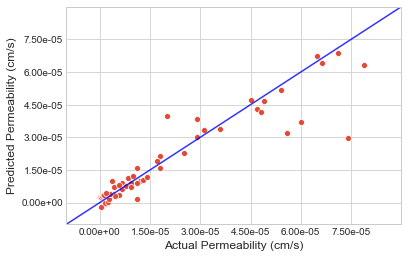

In [213]:
fig,ax = plt.subplots()
sns.scatterplot(dfUnscaled['perm'][:-11], dfUnscaledPr['perm'][:-11], cmap="viridis" )
plt.xlabel('Actual Permeability (cm/s)')
plt.ylabel('Predicted Permeability (cm/s)')
# plt.axis('equal')
# plt.axis('square')
plt.xlim(-0.1e-04, 9.0e-05)
plt.ylim(-0.1e-04, 9.0e-05)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax.xaxis.set_ticks(np.arange(0.0e-04, 9.0e-05, 1.5e-05))
ax.yaxis.set_ticks(np.arange(0.0e-04, 9.0e-05, 1.5e-05))
_ = sns.lineplot([-3, 3], [-3, 3], color="blue", alpha=0.8)
plt.savefig("Training-set-prediction.png", dpi=1400)

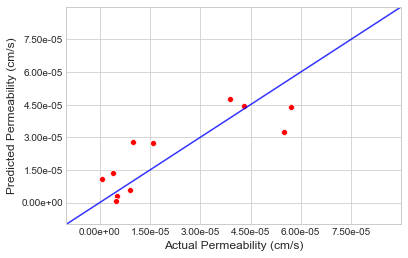

In [214]:
fig,ax = plt.subplots()
sns.scatterplot(dfUnscaled['perm'][-11:], dfUnscaledPr['perm'][-11:], color="red" )
sns.scatterplot(dfUnscaled['perm'][-11:], dfUnscaledPr['perm'][-11:], color="red" )
plt.xlabel('Actual Permeability (cm/s)')
plt.ylabel('Predicted Permeability (cm/s)')
#plt.axis('equal')
#plt.axis('square')
plt.xlim(-0.1e-04, 9.0e-05)
plt.ylim(-0.1e-04, 9.0e-05)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax.xaxis.set_ticks(np.arange(0.0e-04, 9.0e-05, 1.5e-05))
ax.yaxis.set_ticks(np.arange(0.0e-04, 9.0e-05, 1.5e-05))
_ = sns.lineplot([-3, 3], [-3, 3], color="blue", alpha=0.8)
plt.savefig("Test-set-prediction.png", dpi=1400)

In [147]:
test_predictions[11:]

array([-0.54055833,  0.59074943,  0.41663658,  1.10947754,  1.97340559,
       -0.81024577, -0.50690334])

In [123]:
cnsDf['Pred_perm'] = test_predictions[11:]